# Book Genre Classification

### Importing Required Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv('BooksDataSet.csv')
df.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [5]:
df.describe()

,book_id
count,3.000000e+03
mean,9.258275e+06
std,8.375375e+06
min,8.430000e+02
25%,2.944599e+06
50%,6.169495e+06
75%,1.373293e+07
max,3.705402e+07


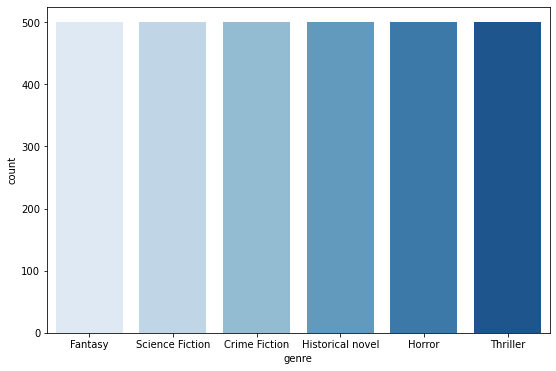

In [6]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['genre'],palette='Blues')
plt.xticks(rotation = 0)
plt.show()

## Preprocessing the Text using Natural Language Processing Techniques

In [7]:

def cleaned_sentence(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split()) # Removed white spaces
    text = text.lower() #Lowered the sentence for easy parsing
    return text
   
df['summary'] = df['summary'].apply(lambda x:cleaned_sentence(x))
df['summary']

0       drowned wednesday is the first trustee among t...
1       as the book opens jason awakens on a school bu...
2       cugel is easily persuaded by the merchant fian...
3       the book opens with herald mage vanyel returni...
4       taran and gurgi have returned to caer dallben ...
                              ...                        
2995    a novel from the numa files a kurt austin adve...
2996    gilbert kemp is dealer specializing in antique...
2997    how do you know when you re in too deep davey ...
2998    the story concerns the life of johnnie pascoe ...
2999    the first chief will henry lee the novel opens...
Name: summary, Length: 3000, dtype: object

#### Plotting the most Frequent Words

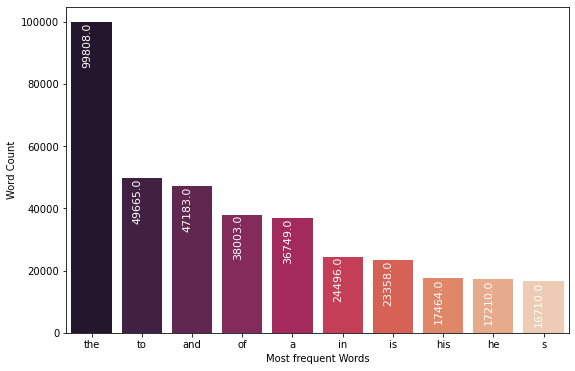

In [8]:
def frequentwords(text,word_count):
    words = ' '.join([x for x in text])
    words = words.split()
    fdist = nltk.FreqDist(words) #creates a new data object with word frequency
    df1 = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    df = df1.nlargest(columns="count",n = word_count)
    plt.figure(figsize=(9,6))
    ax = sns.barplot(data=df, x = 'word',y = 'count',palette='rocket')
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',\
                    (p.get_x()+0.2, p.get_height()),\
                    ha='center', va='top', color='white', size=11,rotation=90)
    ax.set(xlabel='Most frequent Words')
    ax.set(ylabel = 'Word Count')
    plt.show()
    
    return df1
       
# 10 most frequent words
df1 = frequentwords(df['summary'],10)

### Removing the stopwords

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

df['summary'] = df['summary'].apply(lambda x:remove_stopwords(x))
df['summary']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bdvvgangarajuabbireddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       drowned wednesday first trustee among morrow d...
1       book opens jason awakens school bus unable rem...
2       cugel easily persuaded merchant fianosther att...
3       book opens herald mage vanyel returning countr...
4       taran gurgi returned caer dallben following ev...
                              ...                        
2995    novel numa files kurt austin adventure novel m...
2996    gilbert kemp dealer specializing antique guns ...
2997    know deep davey always lived shadow older brot...
2998    story concerns life johnnie pascoe retired com...
2999    first chief henry lee novel opens growing town...
Name: summary, Length: 3000, dtype: object

## Lemmatizing

In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl=WordNetLemmatizer()

def lematizing(sentence):
    Sentence = ""
    for word in sentence.split():
        s = wnl.lemmatize(word)
        Sentence += s
        Sentence += " "
    Sentence = Sentence.strip() #Removes whitespaces
    return Sentence


df['summary'] = df['summary'].apply(lambda x: lematizing(x))
df['summary']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bdvvgangarajuabbireddy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       drowned wednesday first trustee among morrow d...
1       book open jason awakens school bus unable reme...
2       cugel easily persuaded merchant fianosther att...
3       book open herald mage vanyel returning country...
4       taran gurgi returned caer dallben following ev...
                              ...                        
2995    novel numa file kurt austin adventure novel ma...
2996    gilbert kemp dealer specializing antique gun l...
2997    know deep davey always lived shadow older brot...
2998    story concern life johnnie pascoe retired comm...
2999    first chief henry lee novel open growing town ...
Name: summary, Length: 3000, dtype: object

## Stemming 

In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    new_sentence = ""
    for word in sentence.split():
        s = stemmer.stem(word)
        new_sentence+=s
        new_sentence+=" "
        
    new_sentence = new_sentence.strip()
    return new_sentence

df['summary'] = df['summary'].apply(lambda text:stemming(text))
df['summary']

0       drown wednesday first truste among morrow day ...
1       book open jason awaken school bu unabl rememb ...
2       cugel easili persuad merchant fianosth attempt...
3       book open herald mage vanyel return countri va...
4       taran gurgi return caer dallben follow event t...
                              ...                        
2995    novel numa file kurt austin adventur novel mai...
2996    gilbert kemp dealer special antiqu gun london ...
2997    know deep davey alway live shadow older brothe...
2998    stori concern life johnni pasco retir commerci...
2999    first chief henri lee novel open grow town del...
Name: summary, Length: 3000, dtype: object

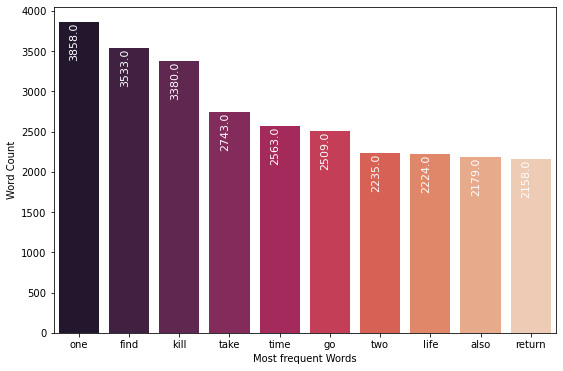

In [12]:
# visualising frewords

most_freq_df = frequentwords(df['summary'],10)

##  Encoding

In [13]:
list_of_books = list(df['genre'].unique())
x = [i for i in range(len(list_of_books))]
Allocated_Genres = dict(zip(list_of_books,x))
Allocated_Genres

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [14]:
df['Genre_value'] = df['genre'].map(Allocated_Genres)

## Model Building

## Count Vectorizer

In [15]:
vectorizer=CountVectorizer(max_df=0.75,min_df=2,max_features=1000,stop_words='english')
word_vec = vectorizer.fit_transform(df['summary'])
word_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 245387 stored elements in Compressed Sparse Row format>

### Train_Test_Split

In [16]:
test_set = df['genre']
X_train, X_test, y_train, y_test = train_test_split(word_vec,test_set,test_size=0.2)
X_train.shape,X_test.shape

((2400, 1000), (600, 1000))

## Support Vector Classifier

In [17]:
svc = SVC()
svc.fit(X_train,y_train)
predicted = svc.predict(X_test)
round(metrics.accuracy_score(y_test,predicted),2)

0.57

## Multinomial Naive Bayes Classifier

In [18]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
predicted_value = mb.predict(X_test)
round(metrics.accuracy_score(y_test,predicted_value),2)

0.66

## Decision Tree Classifier

In [22]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
pred = DTC.predict(X_test
round(metrics.accuracy_score(y_test,pred)),2)

0.44

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y=encoder.fit_transform(df['genre'])

X_train,X_test,y_train,y_test = train_test_split(df['summary'],y,test_size=0.2,\
                                                 random_state=45)

X_train.shape,X_test.shape

((2400,), (600,))

## TF-IDF

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, max_features=10000)
xtrain1 = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest1 = tfidf_vectorizer.transform(X_test.values.astype('U'))

## Support Vector Classifier

In [25]:
svc = SVC()
svc.fit(xtrain1,y_train)
predicted = svc.predict(xtest1)
round(metrics.accuracy_score(y_test,predicted),4)

0.7267

## Multinomial Naive Bayes Classifier

In [26]:
mb = MultinomialNB()
mb.fit(xtrain1,y_train)
predicted_value = mb.predict(xtest1)
round(metrics.accuracy_score(y_test,predicted_value),4)

0.73

## Decision Tree Classifier

In [33]:
DTC = DecisionTreeClassifier()
DTC.fit(xtrain1,y_train)
pred = DTC.predict(xtest1)
round(metrics.accuracy_score(y_test,pred),2)

0.41

## Testing the Model

In [34]:
def model_testing(text,model):
    
    text = cleaned_sentence(text)
    text = remove_stopwords(text)
    text = lematizing(text)
    text = stemming(text)
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted

x = df['summary'].apply(lambda text:model_testing(text,mb))

In [35]:
Genre_Predicted = []
for i in range(len(x)):
    value = x[i][0]
    Genre_Predicted.append(list(Allocated_Genres.keys())[list(Allocated_Genres.values()).index(value)])
Genre_Predicted[:10]

['Science Fiction',
 'Science Fiction',
 'Science Fiction',
 'Science Fiction',
 'Science Fiction',
 'Horror',
 'Science Fiction',
 'Science Fiction',
 'Science Fiction',
 'Science Fiction']

In [36]:
## mapping the training genre as well

Map = dict([(value,key) for key,value in Allocated_Genres.items()])
Map

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [37]:
df['Actual Genre'] = df['Genre_value'].map(Map)
df['Predicted_Genre'] = np.array(Genre_Predicted)
df.head(10)

,book_id,book_name,genre,summary,Genre_value,Actual Genre,Predicted_Genre
0,3248537,Drowned Wednesday,Fantasy,drown wednesday first truste among morrow day ...,0,Fantasy,Science Fiction
1,27796919,The Lost Hero,Fantasy,book open jason awaken school bu unabl rememb ...,0,Fantasy,Science Fiction
2,3910776,The Eyes of the Overworld,Fantasy,cugel easili persuad merchant fianosth attempt...,0,Fantasy,Science Fiction
3,5969644,Magic's Promise,Fantasy,book open herald mage vanyel return countri va...,0,Fantasy,Science Fiction
4,3173445,Taran Wanderer,Fantasy,taran gurgi return caer dallben follow event t...,0,Fantasy,Science Fiction
5,19401625,Thendara House,Fantasy,novel concern dwell darkovan order renunci als...,0,Fantasy,Horror
6,6563632,The Thief,Fantasy,gen releas prison magu king scholar magu find ...,0,Fantasy,Science Fiction
7,8700946,The Sweet Far Thing,Fantasy,prologu begin two men search river london thre...,0,Fantasy,Science Fiction
8,6216269,Mistborn: The Final Empire,Fantasy,luthadel capit citi final empir vin scrawni st...,0,Fantasy,Science Fiction
9,10933407,The Sorcerer's Ship,Fantasy,man name gene find cast new world power godlik...,0,Fantasy,Science Fiction


In [38]:
df = df[['book_name','summary','Actual Genre','Predicted_Genre']]
df

,book_name,summary,Actual Genre,Predicted_Genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,Fantasy,Science Fiction
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,Fantasy,Science Fiction
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Science Fiction
3,Magic's Promise,book open herald mage vanyel return countri va...,Fantasy,Science Fiction
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Science Fiction
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,Thriller,Thriller
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,know deep davey alway live shadow older brothe...,Thriller,Science Fiction
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,Thriller,Thriller


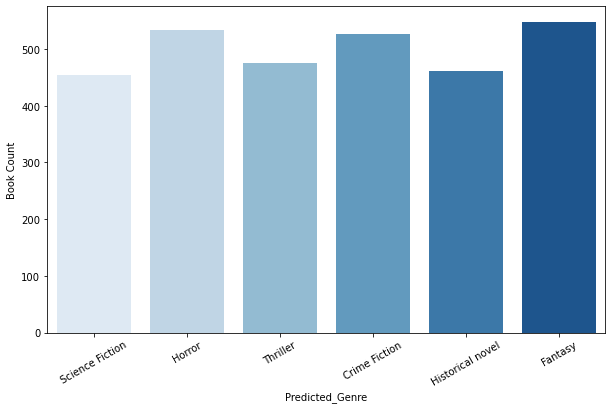

In [41]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = df['Predicted_Genre'],palette='Blues')
plt.xticks(rotation = 30)
ax.set(ylabel='Book Count')
plt.show()

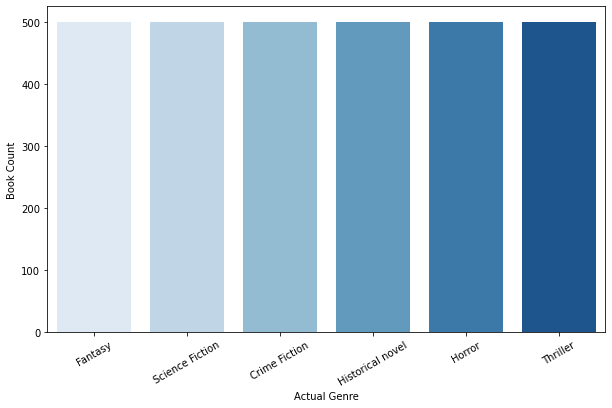

In [42]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = df['Actual Genre'],palette='Blues')
ax.set(ylabel='Book Count')
plt.xticks(rotation = 30)
plt.show()

In [ ]:
df.tail()